**MLDL Exp 3 - Decision Tree & Random Forest**

                      Model  Accuracy (%)  Precision (%)  Recall (%)  \
0  Decision Tree (Baseline)         100.0          100.0       100.0   
1  Random Forest (Baseline)         100.0          100.0       100.0   

   F1-Score (%)  
0         100.0  
1         100.0  


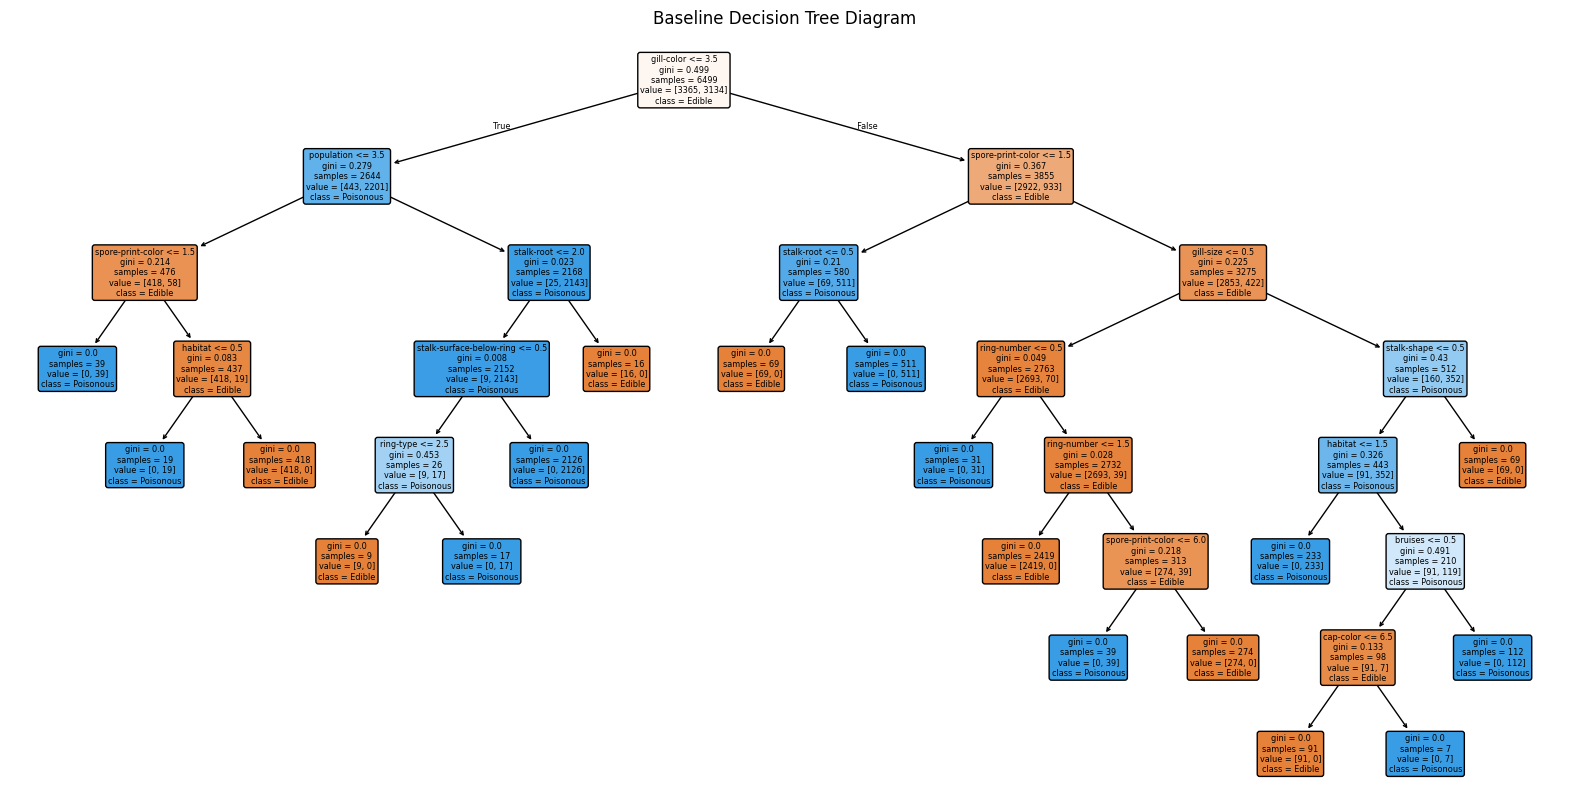

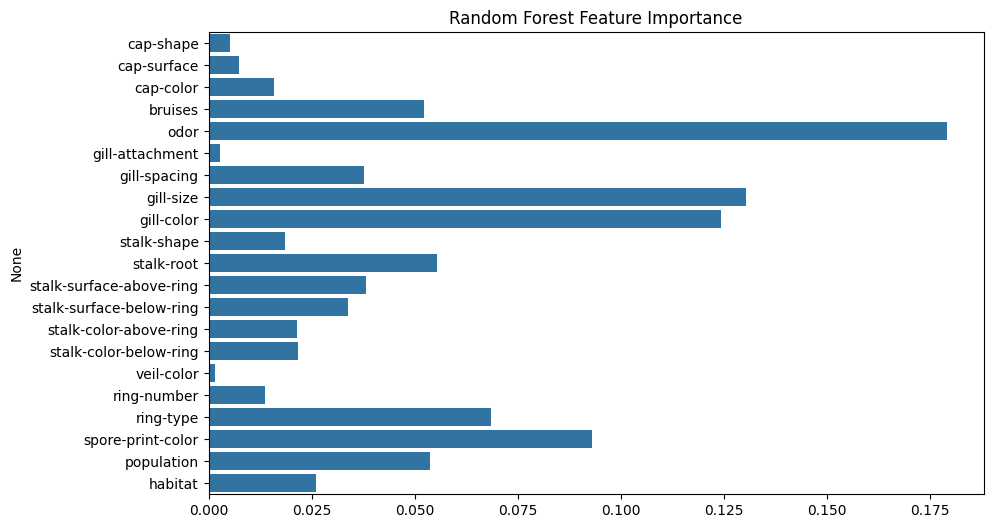

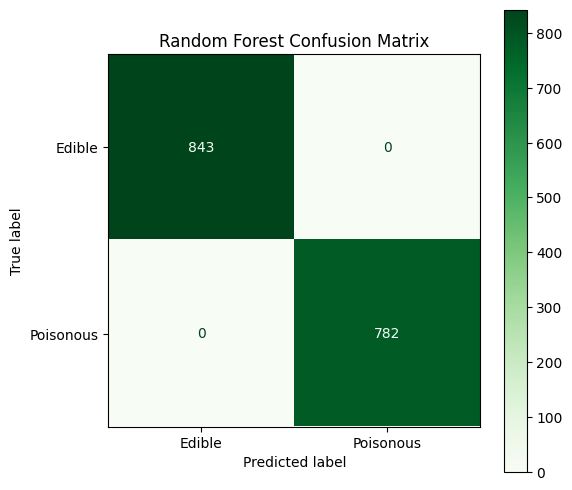

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# 1. Load and Preprocess Data
df = pd.read_csv('mushrooms.csv')
df = df.drop(['veil-type'], axis=1) # Constant value column

# Encode labels
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Baseline Models
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

# 3. Quantitative Metrics (Mathematical Solving)
def get_metrics(y_true, y_pred, name):
    return {
        'Model': name,
        'Accuracy (%)': round(accuracy_score(y_true, y_pred) * 100, 2),
        'Precision (%)': round(precision_score(y_true, y_pred) * 100, 2),
        'Recall (%)': round(recall_score(y_true, y_pred) * 100, 2),
        'F1-Score (%)': round(f1_score(y_true, y_pred) * 100, 2)
    }

metrics_base = [
    get_metrics(y_test, dt_base.predict(X_test), 'Decision Tree (Baseline)'),
    get_metrics(y_test, rf_base.predict(X_test), 'Random Forest (Baseline)')
]
print(pd.DataFrame(metrics_base))

# 4. Visualizations (No Hyperparameters)
# Diagram 1: Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_base, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, rounded=True)
plt.title("Baseline Decision Tree Diagram")
plt.savefig('baseline_dt_diagram.png')

# Diagram 2: Random Forest Feature Importance
plt.figure(figsize=(10, 6))
importances = rf_base.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Random Forest Feature Importance")
plt.savefig('rf_feature_importance.png')

# Diagram 3: Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(rf_base, X_test, y_test, display_labels=['Edible', 'Poisonous'], cmap='Greens', ax=ax)
plt.title("Random Forest Confusion Matrix")
plt.savefig('baseline_rf_cm.png')


--- Hyperparameter Tuned Metrics ---
                   Model  Accuracy (%)  Precision (%)  Recall (%)  \
0  Decision Tree (Tuned)         100.0          100.0       100.0   
1  Random Forest (Tuned)         100.0          100.0       100.0   

   F1-Score (%)  
0         100.0  
1         100.0  
Best DT Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best RF Params: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}


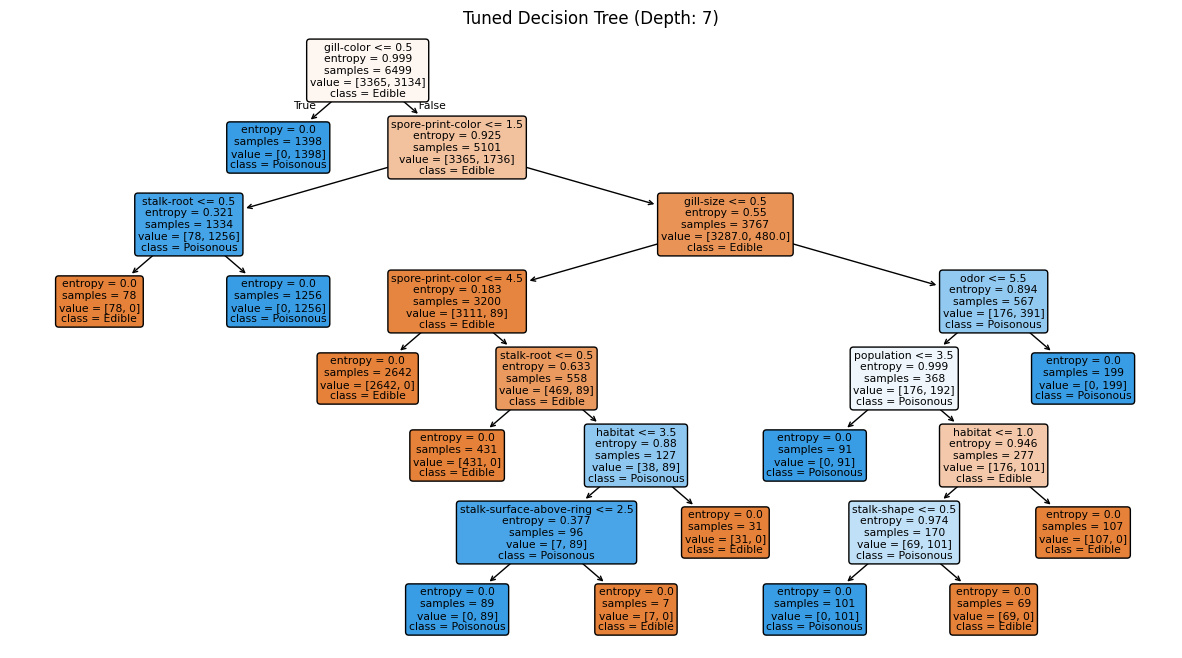

In [2]:
from sklearn.model_selection import GridSearchCV

# A) Hyperparameter Tuning Execution
# Tune Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Tune Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Final Quantitative Metrics
metrics_tuned = [
    get_metrics(y_test, best_dt.predict(X_test), 'Decision Tree (Tuned)'),
    get_metrics(y_test, best_rf.predict(X_test), 'Random Forest (Tuned)')
]
print("\n--- Hyperparameter Tuned Metrics ---")
print(pd.DataFrame(metrics_tuned))
print(f"Best DT Params: {grid_dt.best_params_}")
print(f"Best RF Params: {grid_rf.best_params_}")

# B) Tuned Diagrams
# Visualization of the Tuned (Optimized) Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(best_dt, feature_names=X.columns, class_names=['Edible', 'Poisonous'], filled=True, rounded=True)
plt.title(f"Tuned Decision Tree (Depth: {best_dt.get_depth()})")
plt.savefig('tuned_dt_diagram.png')